In [4]:
%reload_ext autoreload
%autoreload 2

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import ascii
from astropy.table import Table, vstack
import pandas as pd
import imp
_, pathgrbz, _ = imp.find_module("pyGRBz")
path = os.getcwd()

# Fit only one SED

In [7]:
from pyGRBz.pyGRBz import GRB_photoZ

In [8]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/sed/',
    #output_dir='/home/nrakotondrainibe/Bureau/grb_git/codes____/photoz_module/SED',
    thres_err=0.02, # if flux_err/flux < thres_err then set flux_err = thres_err*flux
    wvl_step=50, # angstroms
    wvl_step_X=10 # angstroms
)

In [9]:
# Load the GRB SED stored in data/sed/
photoz.load_data(data_dir='/data/sed/',data_name=['GRB050904'])


Observations:
    Name   time_since_burst band  flux flux_err  zp flux_unit detection telescope
--------- ---------------- ---- ----- -------- --- --------- --------- ---------
GRB050904            1.155   Ks 19.26     0.07   -        AB         1     isaac
GRB050904            1.155    H 19.74     0.07   -        AB         1     isaac
GRB050904            1.155    J 20.14     0.06   -        AB         1     isaac
GRB050904            1.155    z 21.03     0.22   -        AB         1     fors2
GRB050904            1.155    I 22.27     0.22   -        AB         1     cafos
GRB050904            1.155    I  24.2      0.2   -        AB         1     fors2
GRB050904            1.155    R 24.29     0.05   -        AB         0     cafos
GRB050904            1.155    V 24.23     0.05   -        AB         0     laica


Info about data:
    name   type  RA_J2000   DEC_J2000   MW_corrected time_since_burst time_unit ... beta beta_sup beta_inf beta_X beta_X_sup beta_X_inf
--------- ---- ----

In [10]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
    Name   time_since_burst band  flux flux_err ... zeropoint          sys_response         ext_mag     flux_corr         flux_corr_err   
                                               ...                                                      microJy             microJy      
--------- ---------------- ---- ----- -------- ... --------- ----------------------------- ------- ------------------ -------------------
GRB050904            1.155    V 24.23     0.05 ...       0.0   0.020217596946395588 .. 0.0     0.0 0.7379042301291044 0.18434138332737574
GRB050904            1.155    R 24.29     0.05 ...       0.0                    0.0 .. 0.0     0.0 0.6982324040771732  0.1793175688589099
GRB050904            1.155    I  24.2      0.2 ...       0.0 0.00020514022465966316 .. 0.0     0.0 0.7585775750291881 0.37381165483615203
GRB050904            1.155    I 22.27     0.22 ...       0.0                    0.0 .. 0.0     0.0  4.487453899331295  0.9535625369951598
GRB050904       

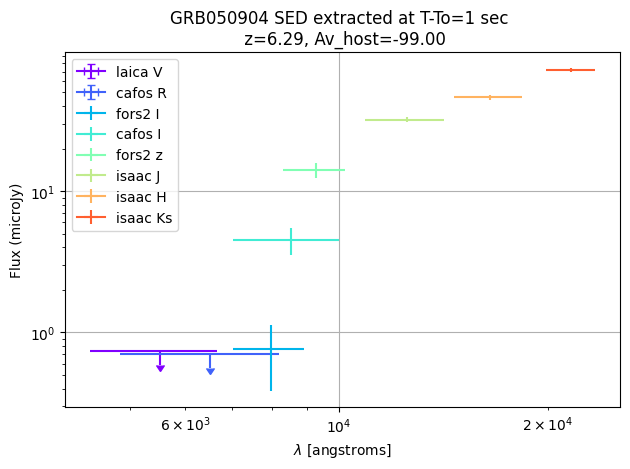


SEDS:
    Name   time_since_burst band  flux flux_err flux_unit
--------- ---------------- ---- ----- -------- ---------
GRB050904            1.155    V 24.23     0.05        AB
GRB050904            1.155    R 24.29     0.05        AB
GRB050904            1.155    I  24.2      0.2        AB
GRB050904            1.155    I 22.27     0.22        AB
GRB050904            1.155    z 21.03     0.22        AB
GRB050904            1.155    J 20.14     0.06        AB
GRB050904            1.155    H 19.74     0.07        AB
GRB050904            1.155   Ks 19.26     0.07        AB



In [11]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#photoz.extract_sed(model='BPL',method='fixed',time_SED=70)

In [12]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0.5,20])#,NHx=[0,10])



Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 87.14it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [49.5201351  47.92519401 50.90285268 54.11115362]



Autocorrelation time: 49.52 steps


Mean acceptance fraction: 0.036

Best fit:
z: 6.505  Av: 0.082  beta: 1.279  Norm: 1.296     chi2: 6.001

Mean Proba: 1.31e-03
Sum Proba: 2.63e+01

68% - 1 sigma:
z: 6.012 +0.596 -5.457
Av: 0.638 +3.465 -0.382
Beta: 0.544 +0.654 -0.399
norm: 3.894 +4.989 -1.824

95% - 2 sigma:
z: 6.012 +1.787 -5.971
Av: 0.638 +7.075 -0.547
Beta: 0.544 +1.437 -0.519
norm: 3.894 +12.550 -2.711

99% - 3 sigma:
z: 6.012 +2.525 -6.008
Av: 0.638 +8.983 -0.627
Beta: 0.544 +2.057 -0.536
norm: 3.894 +14.454 -2.931


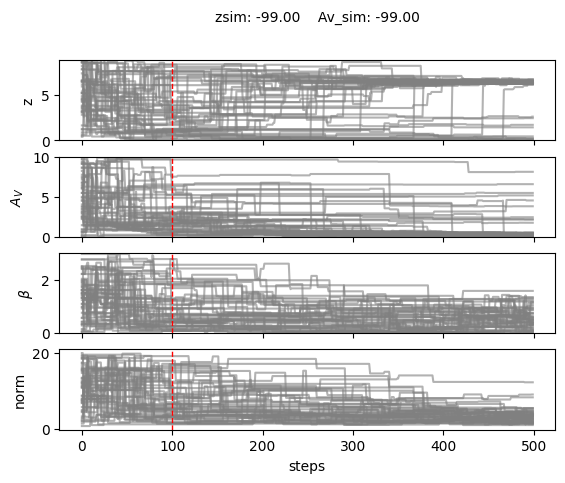

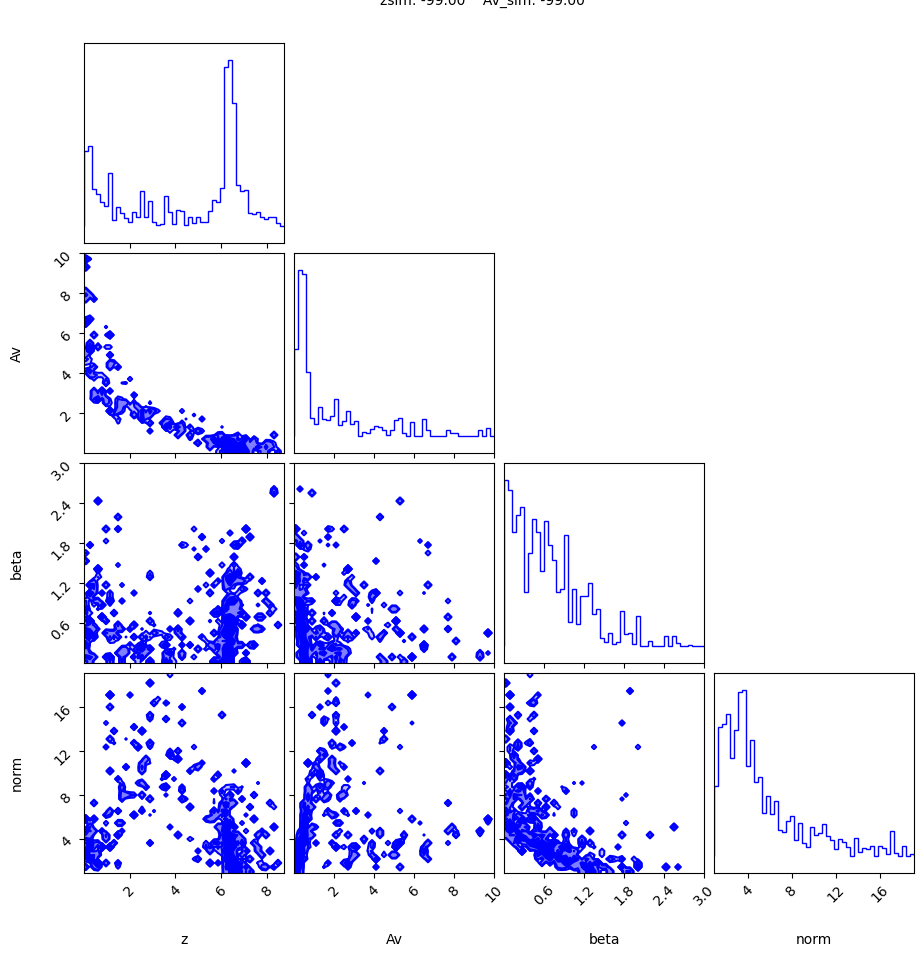


For best SED plot:
- Median values PDF: 6.012 0.638 0.544 3.894
- Best fit: 6.505 0.082 1.279 1.296


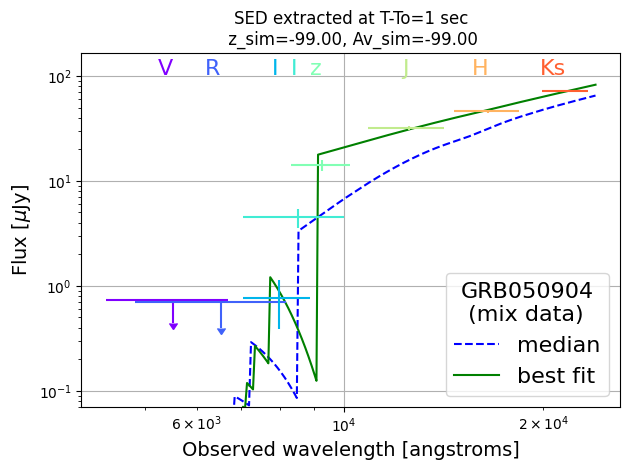


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 87.81it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [54.38244074 51.23216075 52.23927449 55.97676487]



Autocorrelation time: 54.38 steps


Mean acceptance fraction: 0.051

Best fit:
z: 6.534  Av: 0.244  beta: 1.029  Norm: 2.012     chi2: 5.144

Mean Proba: 3.44e-03
Sum Proba: 6.89e+01

68% - 1 sigma:
z: 6.349 +0.279 -5.248
Av: 0.626 +2.782 -0.237
Beta: 0.557 +0.414 -0.372
norm: 4.565 +5.277 -1.859

95% - 2 sigma:
z: 6.349 +1.643 -6.258
Av: 0.626 +7.796 -0.403
Beta: 0.557 +1.175 -0.542
norm: 4.565 +11.693 -3.123

99% - 3 sigma:
z: 6.349 +2.111 -6.332
Av: 0.626 +8.854 -0.513
Beta: 0.557 +1.732 -0.556
norm: 4.565 +15.176 -3.207


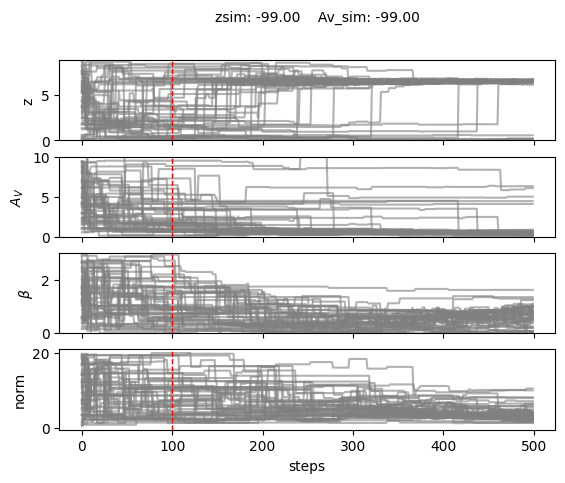

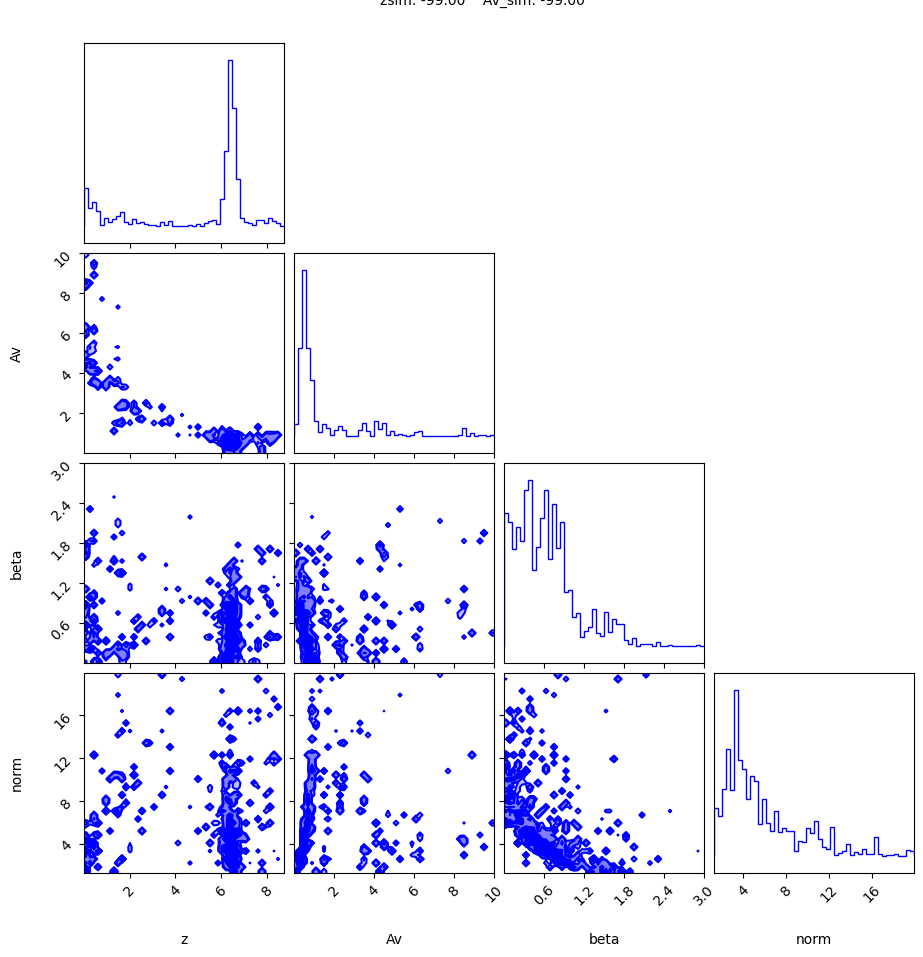


For best SED plot:
- Median values PDF: 6.349 0.626 0.557 4.565
- Best fit: 6.534 0.244 1.029 2.012


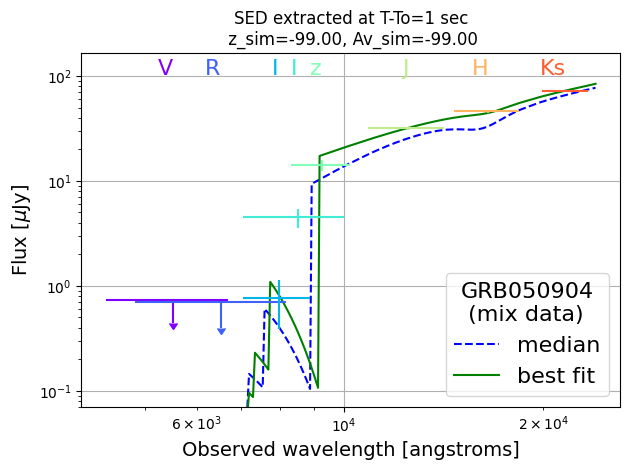


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 86.61it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [49.34820737 49.27164684 53.38156359 55.12620557]



Autocorrelation time: 49.35 steps


Mean acceptance fraction: 0.035

Best fit:
z: 6.555  Av: 0.058  beta: 1.455  Norm: 1.133     chi2: 4.761

Mean Proba: 2.00e-03
Sum Proba: 4.00e+01

68% - 1 sigma:
z: 6.574 +1.143 -6.012
Av: 0.896 +3.021 -0.635
Beta: 1.075 +0.374 -0.568
norm: 4.341 +7.776 -2.646

95% - 2 sigma:
z: 6.574 +1.358 -6.480
Av: 0.896 +8.526 -0.859
Beta: 1.075 +1.389 -1.008
norm: 4.341 +15.289 -3.250

99% - 3 sigma:
z: 6.574 +1.938 -6.559
Av: 0.896 +9.087 -0.888
Beta: 1.075 +1.920 -1.032
norm: 4.341 +15.503 -3.371


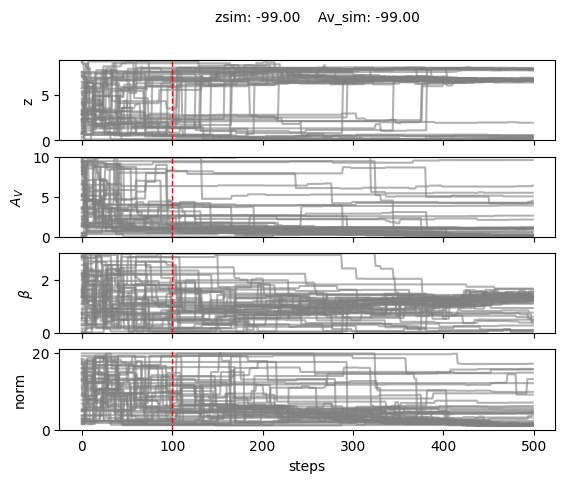

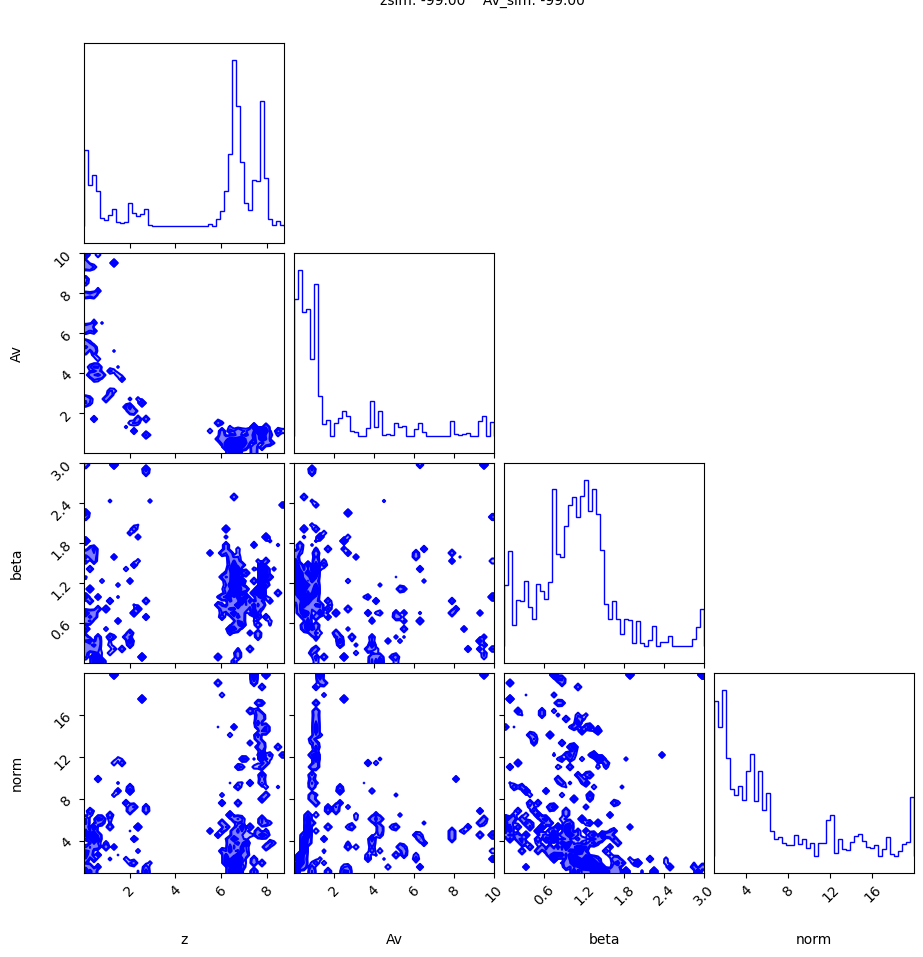


For best SED plot:
- Median values PDF: 6.574 0.896 1.075 4.341
- Best fit: 6.555 0.058 1.455 1.133


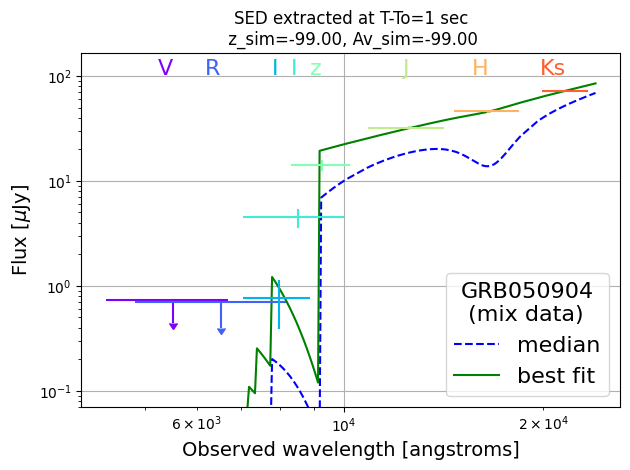


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 100.18it/s]



Autocorrelation time: nan steps


Mean acceptance fraction: 0.253

Best fit:
z: 6.580  beta: 1.500  Norm: 0.982     chi2: 5.271

Mean Proba: 2.25e-02
Sum Proba: 4.20e+02

68% - 1 sigma:
z: 6.574 +0.103 -0.127
Beta: 1.489 +0.117 -0.125
norm: 0.987 +0.056 -0.044

95% - 2 sigma:
z: 6.574 +0.861 -6.113
Beta: 1.489 +0.619 -1.432
norm: 0.987 +14.770 -0.097

99% - 3 sigma:
z: 6.574 +2.108 -6.517
Beta: 1.489 +0.800 -1.468
norm: 0.987 +15.023 -0.322


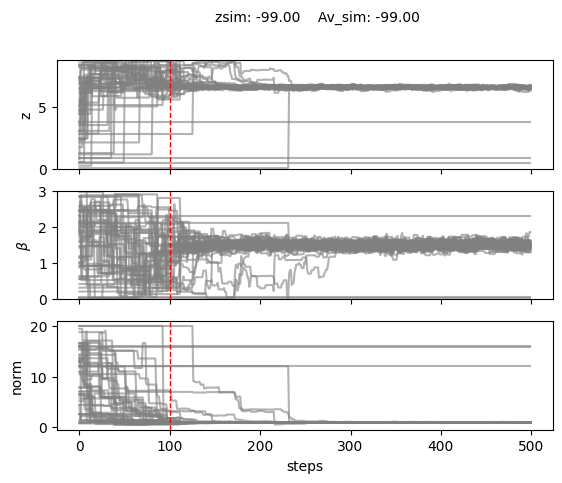

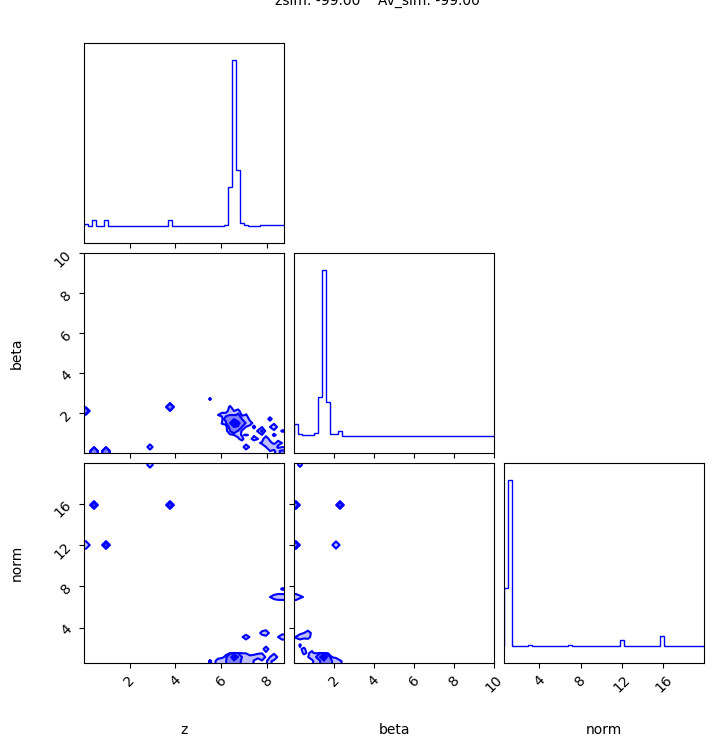


For best SED plot:
- Median values PDF: 6.574 0.000 1.489 0.987
- Best fit: 6.580 0.000 1.500 0.982


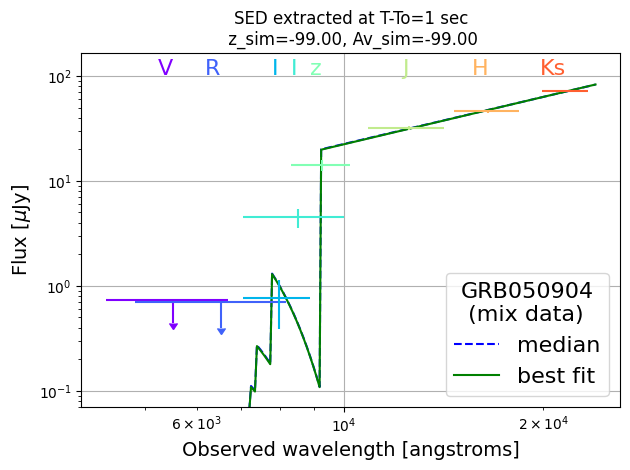


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 93.35it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [43.88901942 42.49541876 49.29211262 53.7192187 ]



Autocorrelation time: 43.89 steps


Mean acceptance fraction: 0.051

Best fit:
z: 6.084  Av: 0.522  beta: 1.226  Norm: 2.872     chi2: 6.741

Mean Proba: 1.54e-03
Sum Proba: 3.07e+01

68% - 1 sigma:
z: 5.903 +0.228 -4.668
Av: 1.058 +1.650 -0.459
Beta: 0.938 +0.272 -0.307
norm: 6.661 +6.017 -3.443

95% - 2 sigma:
z: 5.903 +1.144 -5.358
Av: 1.058 +4.662 -0.710
Beta: 0.938 +0.720 -0.878
norm: 6.661 +10.902 -4.570

99% - 3 sigma:
z: 5.903 +2.007 -5.676
Av: 1.058 +8.889 -0.936
Beta: 0.938 +2.022 -0.936
norm: 6.661 +13.220 -5.349


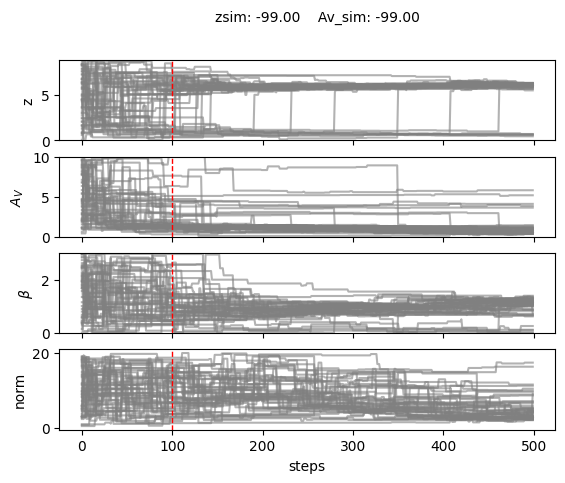

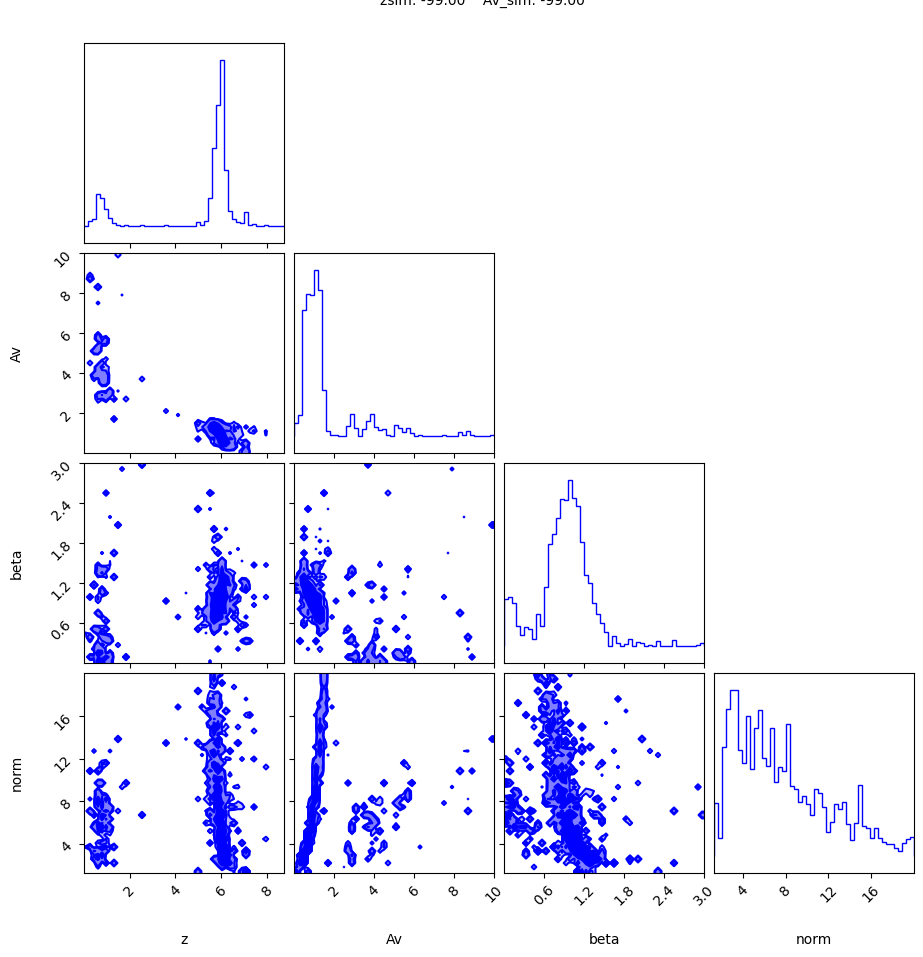


For best SED plot:
- Median values PDF: 5.903 1.058 0.938 6.661
- Best fit: 6.084 0.522 1.226 2.872


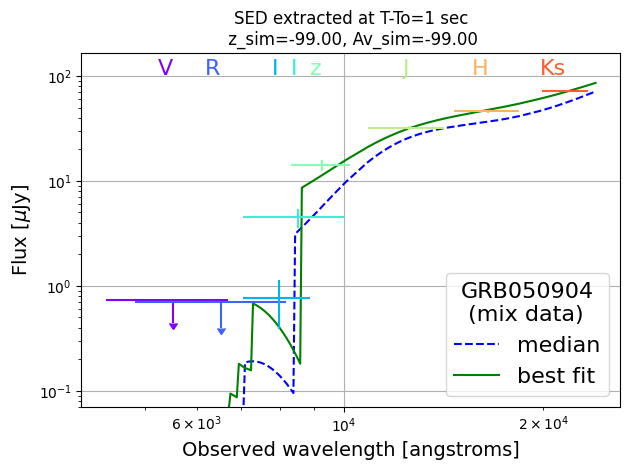


List of GRB not detected: []

None


In [13]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase, values returning the best chi2
# are used as initial values for production run. Set to 0 if you do not want this 
# Nsteps2: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'

ext_laws = ['smc', 'lmc', 'mw', 'nodust','sne']
for law in ext_laws:
    photoz.fit(
        ext_law=law,
        Nthreads=6,
        nwalkers=50,
#        Nsteps1=500,
#        Nsteps2=1000,
        Nsteps1=0,
        Nsteps2=500,
        nburn=100,
#        nburn=300,
        Host_dust=True,
        Host_gas=False,
        igm_att='Meiksin',
        clean_data=False,
        priors=priors,
        adapt_z=True
        )

# Statistic comparison

In [14]:
from pyGRBz.estimation import stats

In [17]:
out = path+'/results/sed/'+"GRB050904"+"/"

In [18]:
stats(out,ext_laws=ext_laws,lim_bic = 2)

Best fit is given using the  ['nodust']  extinction law
GRB not resolved with BIC threshold of  2
